<a href="https://colab.research.google.com/github/jungyoojang/MachineLearning/blob/main/8_3_%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%98_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 합성곱 신경망의 시각화

In [ ]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 가중치 시각화

합성곱 층은 여러 개의 필터를 사용해 이미지에서 특징을 학습함

각 필터는 커널이라 부르는 가중치와 절편을 보유

일반적으로 절편은 시각적으로 의미가 없음

가중치는 입력 이미지의 2차원 영역에 적용되어서 어떤 특징을 크게 두드러지게 표현하는 역할을 함

체크포인트 파일 불러오기

In [ ]:
from tensorflow import keras

케라스 모델에 추가한 층은 layers 속성에 저장되어 있음

In [ ]:
model = keras.models.load_model('best-cnn-model.h5')

In [ ]:
model.layers

In [ ]:
# 첫 번째 합성곱 층의 가중치 조사
conv = model.layers[0]

print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


커널의 크기가 (3,3)이고, 합성곱 층에 전달되는 입력의 깊이가 1이므로 실제 커널 크기는 (3,3,1)임

필터 개수가 32개이므로 weights의 첫 번째 원소인 가중치의 크기는 (3,3,1,32)

weights의 두 번째 원소는 절편의 개수를 나타내며 각 필터마다 1개의 절편이 있으므로(32,)

**가중치 히스토그램**

weights 속성은 텐서플로의 다차원 배열인 Tensor 클래스의 객체임

다루기 쉽도록 넘파이 배열로 변환

먼저 가중치 배열의 평균과 표준편차를 기준으로 계산하고 히스토그램으로 값을 확인하자

In [ ]:
# 두 번째 합성곱 층의 가중치 조사
conv_weights = conv.weights[0].numpy()

print(conv_weights.mean(), conv_weights.std())

-0.02494116 0.24951957


이 가중치의 평균값은 0에 가깝고 표준편차는 0.24이다.

**가중치의 분포를 히스토그램으로 그려 직관적으로 이해해보자**

In [ ]:
import matplotlib.pyplot as plt

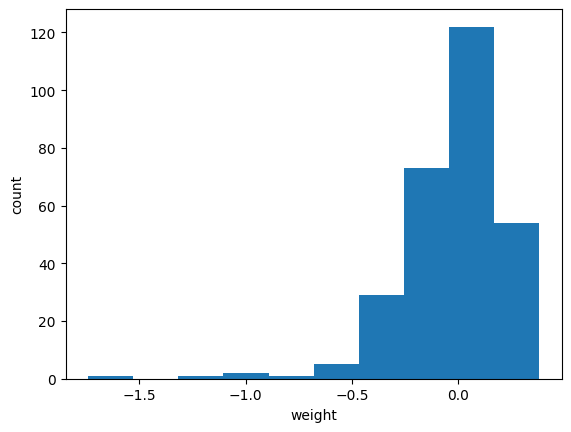

In [ ]:
plt.hist(conv_weights.reshape(-1, 1)) #1차원 배열로 변환
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

히스토그램을 보면 0을 기준으로 종 모양 분포를 띠고 있음

이 가중치는 무슨 의미를 학습한 것인가?

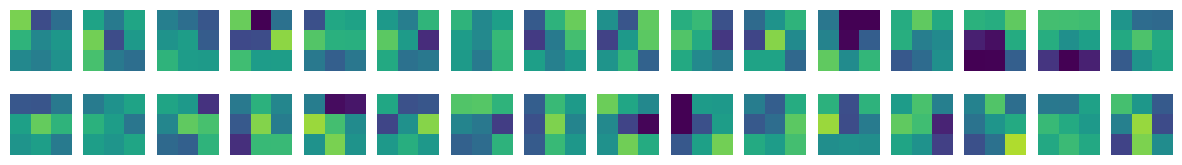

In [ ]:
#32개의 필터를 16개씩 두 줄에 출력
# 이 배열의 마지막 차원을 순회하면서 가중치 값을 차례로 출력한다.
fig, axs = plt.subplots(2, 16, figsize=(15,2)) # figsizw는 각 subplot의 크기가 아닌 전체 그림의 크기

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5) #vmin, vmax: 색상의 최소값과 최대값을 조정
        axs[i, j].axis('off')

plt.show()

결과 그래프를 보면 가중치 값에서 어떤 패턴을 볼 수 있음

참고로 밝은 부분의 값이 높음

첫 번째 줄의 11번째 필터에서 위쪽의 3픽셀의 값이 높음

즉, 이 가중치는 직선을 만나면 크게 활성화할 것임

# 신경망의 가중치는 어떻게 선택될까?

훈련하지 않은 빈 합성곱 신경망 가중치 확인

In [ ]:
# 합성곱층 생성
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                                          padding='same', input_shape=(28,28,1)))

In [ ]:
# 가중치 추출
no_training_conv = no_training_model.layers[0]

print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [ ]:
# 평균, 표준편차 확인
no_training_weights = no_training_conv.weights[0].numpy()

print(no_training_weights.mean(), no_training_weights.std())

-0.010310263 0.0773888


평균은 이전과 동일하게 0과 가깝지만 표준편차는 이전과 달리 매우 작음

또한 최대값과 최소값의 차이도 작음

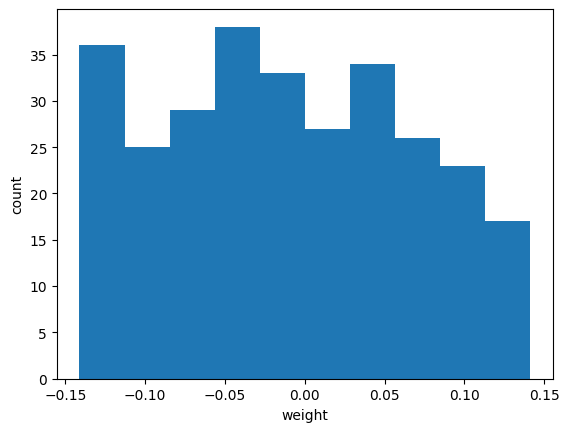

In [ ]:
# 가중치 히스토그램
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

대부분의 가중치가 -0.15 ~ 0.15 사이에 존재하며 비교적 고른 분포를 보임

텐서플로가 신경망의 가중치를 처음 초기화할 때 균등 분포에서 랜덤하게 값을 선택하기 때문

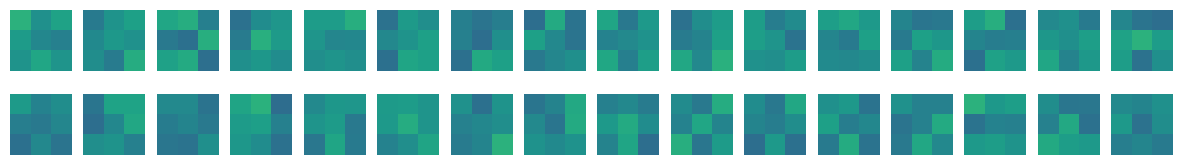

In [ ]:
# 32개 커널의 그래프 영역을 시각화
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

# 합성곱 신경망의 학습을 시작하는 두 번째 방법

케라스 Squential 클래스: 층을 차례대로 쌓은 모델

딥러닝에서는 좀 더 복잡한 모델이 존재

입력이 2개일수도 출력이 2개 일 수도 있음

이러한 경우에 **함수형 API**를 사용함

함수형 API는 케라스의 Model 클래스를 사용하여 모델을 만듬

예를 들어, 7장에서 만들었던 Dense 층 2개로 이루어진 완전 연결 신경망을 함수형 API로 구현하면 다음과 같음

In [ ]:
dense1 = keras.layer.Dense(100, activation='sigmoid')
dense2 = keras.layer.Dense(10, activation='softmax')

파이썬의 모든 객체는 호출이 가능함

케라스의 층은 객체를 함수처럼 호출했을 때 적절히 동작할 수 있도록 미리 준비해 놓음

입력값 inputs을 Dense층에 통과시킨 후 출력값 hidden을 만들어줌

이런 특성을 함수형 API라고 부르게 함

In [ ]:
hidden = dense1(inputs)

첫번째 층의 출력을 입력으로 사용하여 두번째 층 호출

In [ ]:
outputs = dense2(hidden)

inputs와 outputs를 Model 클래스로 연결

In [ ]:
model = keras.Model(inputs, outputs)

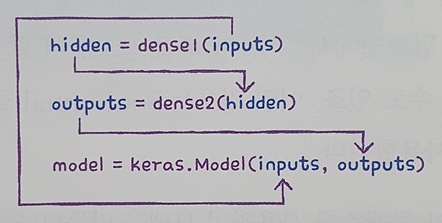

**Sequential 클래스에서 inputLater의 객체는 어디에 저장되는가?**

케라스 모델은 layers 속성 외에 inputLayer 객체를 포함한 _self_tracked_trackables 리스트 속성을 가지고 있음

Seqential 클래스 객체의 _self_tracked_trackables 속성의 첫 번째 항목이 inputLayer 클래스의 객체임

inputLayer클래스는 신경망의 입력층 역할을 함

즉 모델의 입력을 첫 번째 은닉층에 전달하는 역할을 수행

따라서 inputLater 객체의 입력과 출력은 동일함

**inputs이란?**

8-2에서 ploy_model() 함수로 모델의 층을 도식화했을 떄 inputLayer 클래스가 처음에 나왔음

Sequential 클래스는 inputLayer 클래스를 자동으로 추가하고 호출함

그러나 Model 클래스에서는 수동으로 만들어서 호출해야 함

즉 inputs이 inputLayer 클래스의 출력값이 되어야 함

input() 함수 활용 입력값 생성

In [ ]:
inputs = keras.Input(shape=(784,))

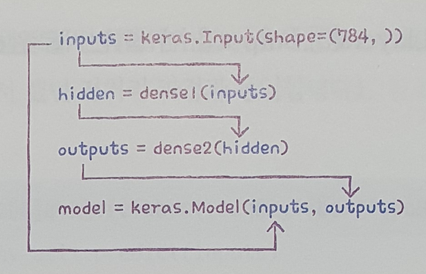

**함수형 API 활용 합성곱 층 모델링**

다양한 형태로 층 연결 가능

model 객체의 층

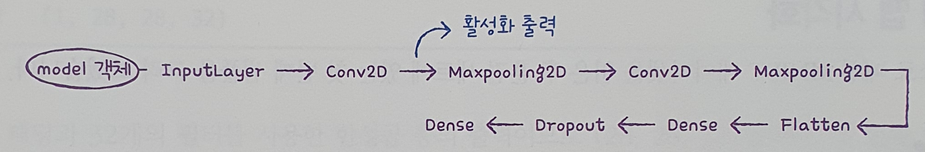

특성맵을 시각화하기 위해서 첫번째 Conv2D의 출력을 필요로 한다.
model 객체의 입력과 Conv2D의 출력을 알 수 있다면 이 둘을 연결하여 새로운 모델을 얻어 보자

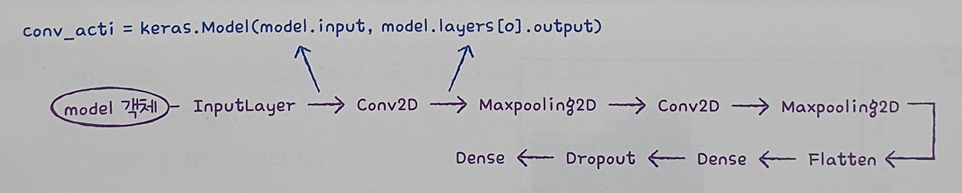

**특성 맵 시각화를 만드는 데 함수형 API가 필요한 이유?**

첫 번째 Conv2D의 출력을 알고 싶다면, model 객체의 입력과 Conv2D의 출력을 이용해 새로운 모델을 만들고 이를 이용

model 객체의 predict() 메서드를 호출하면 입력부터 마지막 층 까지 모든 계산을 수행한 후 최종 출력을 반환함

그러나 필요한 것은 첫 번째 Conv2D 층이 출력한 특성 맵

첫 번째 층의 출력은 Conv2D 객체의 output 속성에서 얻을 수 있음

이것은 model.later[0].output 처럼 참조 가능

model 객체의 입력은 input 속성으로 알수있음

model.input을 사용하면 됨

## 함수형 API

In [ ]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [ ]:
conv_acti = keras.Model(model.input, model.layers[0].output)

model 객체의 predict() 메서드를 호출하면 최종 출력층의 확률을 반환

conv_act의 predict() 메서드를 호출하면 첫 번째 Conv2D의 출력을 반환

## 특성 맵 시각화

conv_acti의 특성 맵 확인

In [ ]:
# 패션 MNIST train set 첫번째 샘플 확인
 (train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


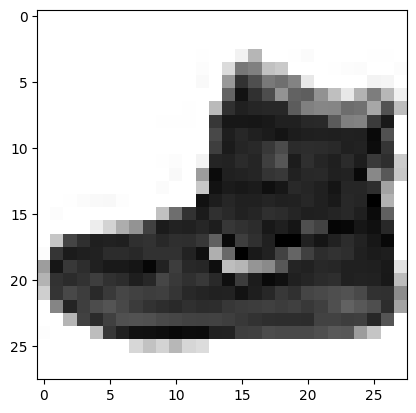

In [ ]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

앵클부츠

이 샘플을 conv_acti 모델에 주입하여 Conv2D 층이 만드는 특성 맵을 출력해보자

predict() 메서드는 항상 입력의 첫번째 차원이 배치 차원일 것으로 기대한다.
따라서 train_input[0:1] (2차원 샘플)로 선택 후 (784,) 크기를 (28,28,1) 크기로 변경하고 255로 나누어 전처리 해준다.

In [ ]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0

feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 9s 9s/step


세임 패딩과 32개의 필터를 사용한 합성곱 층의 출력이므로 (28,28,32) 크기를 가진다.

첫 번째 차원은 배치 크기를 나타내는 배치 차원이며 샘플 하나를 입력했기 떄문에 1이다.

배치 차원: 데이터를 미니배치 단위로 나누어 처리할 때 사용되는 차원

In [ ]:
# 특성 맵 크기 확인
print(feature_maps.shape)

(1, 28, 28, 32)


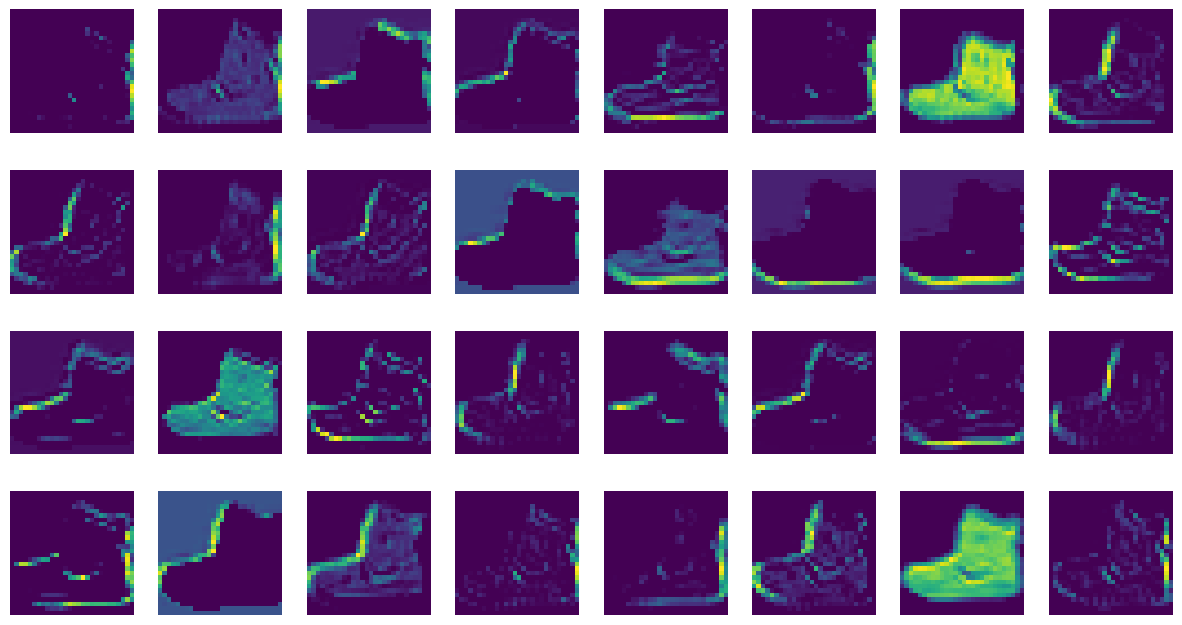

In [ ]:
# 특성 맵 시각화
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

32개의 필터로 인해 입력 이미지에서 강하게 활성화된 부분을 보여주며, 비교를 위해 필터를 다시 출력함

첫 번째 줄의 7번째 그리고 네 번째 줄의 4번째 필터들은 전체적으로 밝은색이므로 전면이 모두 칠해진 영역을 감지함

반대로 두 번째 줄의 6번째 필터는 전체적으로 낮은 음수 값이며, 이 필터와 큰 양수가 곱해지면 더 큰 음수가 되고 배경처럼 0에 가까운 값과 곱해지면 작은 음수가 됨

즉 부츠의 배경이 상대적으로 크게 활성화될 수 있음

첫 번째 줄의 8번째 필터는 오른쪽의 수직선을 감지하므로 이 필터가 감지한 수직선이 강하게 활성화되어있음

**두번째 합성곱 층 특성 맵 확인**

모델 생성

In [ ]:
# 입력과 두번째 합성곱층을 연결한 모델 생성
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [ ]:
# 첫번째 샘플을 predict() 메서드에 전달
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)

1/1 [==============================] - 0s 69ms/step


In [ ]:
# 특성 맵 크기 확인
print(feature_maps.shape)

(1, 14, 14, 64)


첫번째 풀링 층에서 가로세로가 절반으로 줄었고,
필터 개수는 64개 이므로 배치 차원 제외 (14,14,64)이다.

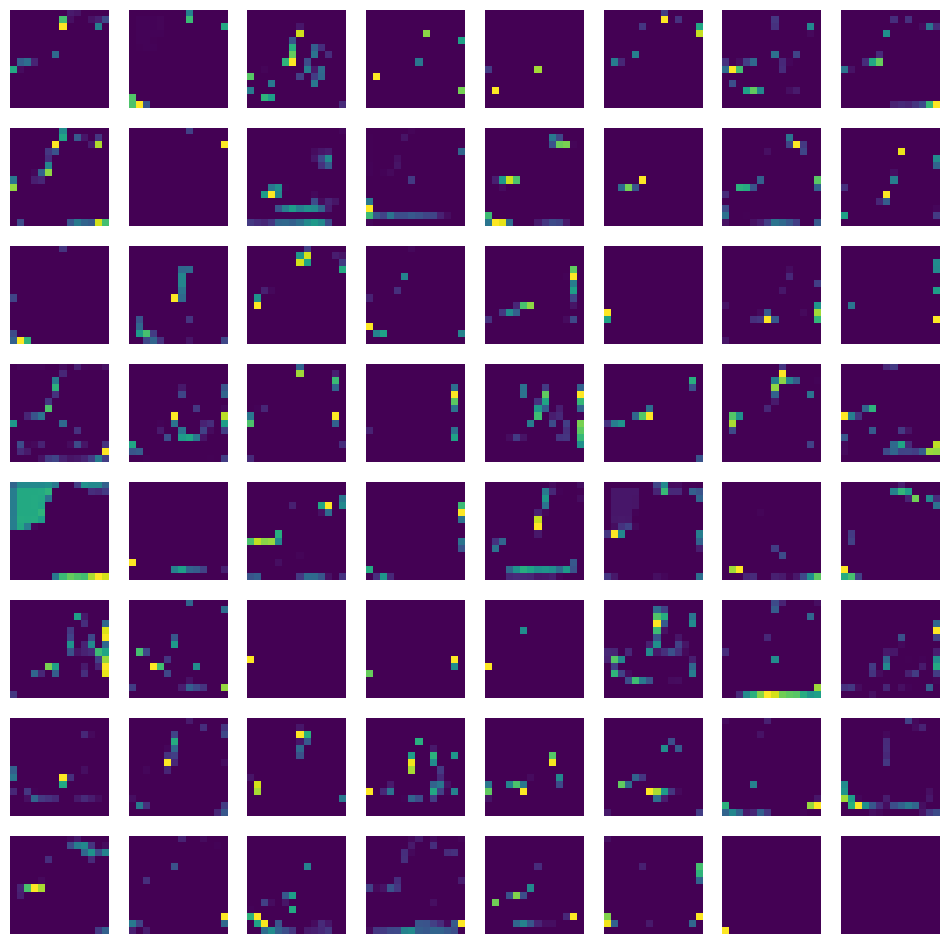

In [ ]:
# 특성 맵 시각화
fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

첫번째 합성곱 층과 달리 시각적으로 이해하기 어렵다.
첫번째 합성곱 층의 특성 맵과 두번째 합성곱 층의 필터가 곱해져
두번째 합성곱 층의 특성 맵이 되기 때문에
특성 맵에서 어떤 부위를 감지하는지 직관적으로 이해하기 어렵다.

이런현상은 합성곱 층을 많이 쌓을수록 심해진다.
합성곱 신경망의 앞부분은 이미지의 시각적인 정보를 감지하고
뒷부분은 앞쪽에서 감지한 시각적인 정보를 바탕으로 추상적인 정보를 학습한다고 볼 수 있다.